## Finding top 5 countries with the highest number of national, religious and observance holidays in 2019



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the csv file to a dataframe

In [2]:
data = pd.read_csv ("out.csv")
data.drop (columns= ['country_code.1','country_name.1','name','description','month','day','id'],  inplace=True)

Check the data

In [3]:
data.head(5)

,country_code,country_name,year,type,location
0,AF,Afghanistan,2019,Season,All
1,AF,Afghanistan,2019,National holiday,All
2,AF,Afghanistan,2019,National holiday,All
3,AF,Afghanistan,2019,National holiday,All
4,AF,Afghanistan,2019,National holiday,All


To remove holidays that are local and find the type of holidays

In [4]:
df = data.drop(data[ data.location != 'All'].index)
df.type.unique()


array(['Season', 'National holiday', 'Observance',
       'Clock change/Daylight Saving Time', 'Common local holiday',
       'Muslim', 'Hebrew', 'Christian', 'Orthodox', 'Local observance',
       'Optional holiday', 'Half-day holiday', 'Hinduism',
       'Local holiday', 'Weekend', 'Flag day', 'De facto holiday',
       'Worldwide observance', 'United Nations observance',
       'Sporting event'], dtype=object)

To remove rows that their types are local or not national

In [5]:
type_to_delete = ['Clock change/Daylight Saving Time', 'Common local holiday','Local observance', 'Optional holiday', 'Half-day holiday', 'Local holiday', 'Sporting event', 'De facto holiday']
df = data.drop(data[ data.type.isin(type_to_delete)].index)
df.type.unique()

array(['Season', 'National holiday', 'Observance', 'Muslim', 'Hebrew',
       'Christian', 'Orthodox', 'Hinduism', 'Weekend', 'Flag day',
       'Worldwide observance', 'United Nations observance'], dtype=object)

Adding a new column to categorize holidays based on their type , drop type and location column, and deleteing row for year of 2018

In [6]:
national = ['National holiday','Weekend', 'Flag day']
religious = ['Muslim', 'Hebrew', 'Christian', 'Orthodox', ]
observance = ['Observance', 'Season', 'Worldwide observance', 'United Nations observance']


df['category'] = 'national'
df.loc[df.type.isin(religious),'category'] = 'religious'
df.loc[df.type.isin(observance),'category'] = 'observance'

df.drop (columns= ['type','location'],  inplace=True)
df = df[df.year == 2019 ]
df.tail(100)

,country_code,country_name,year,category
11925,VN,Vietnam,2019,observance
11926,VN,Vietnam,2019,observance
11927,VN,Vietnam,2019,observance
11928,VN,Vietnam,2019,observance
11952,WF,Wallis and Futuna,2019,national
...,...,...,...,...
12123,SZ,eSwatini,2019,observance
12124,SZ,eSwatini,2019,observance
12125,SZ,eSwatini,2019,national
12126,SZ,eSwatini,2019,national


Grouping holidays based on their category and and count column to compute the number holidays in each category, also order  them

In [7]:
category_national = df.loc[df['category'] == 'national' ] .groupby(['country_name']).size().reset_index(name='counts').sort_values(by= 'counts', ascending=False)
category_religious = df.loc[df['category'] == 'religious'].groupby(['country_name']).size().reset_index(name='counts').sort_values(by= 'counts', ascending=False)
category_observance = df.loc[df['category'] == 'observance'].groupby(['country_name']).size().reset_index(name='counts').sort_values(by= 'counts', ascending=False)

Get the top 5 country in each category

In [8]:
result_national = category_national.head(5)
result_religious = category_religious.head(5)
result_observance = category_observance.head(5)
result_observance.head()

,country_name,counts
218,United States,153
74,Germany,49
97,Israel,39
130,Mexico,31
200,Taiwan,27


Visulize these three findings

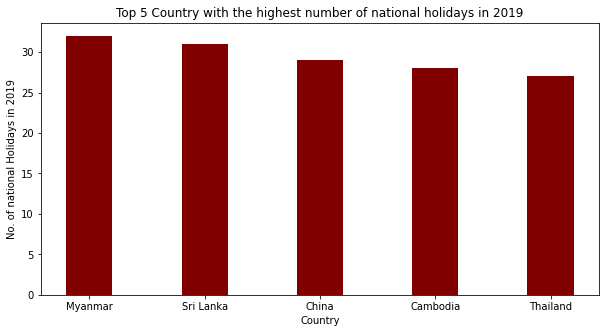

In [9]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_national['country_name'], result_national['counts'], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Country") 
plt.ylabel("No. of national Holidays in 2019") 
plt.title("Top 5 Country with the highest number of national holidays in 2019") 
plt.show() 

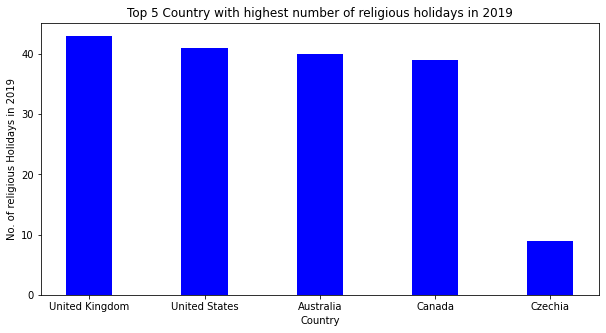

In [10]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_religious['country_name'], result_religious['counts'], color ='blue',  
        width = 0.4) 
  
plt.xlabel("Country") 
plt.ylabel("No. of religious Holidays in 2019") 
plt.title("Top 5 Country with highest number of religious holidays in 2019") 
plt.show() 

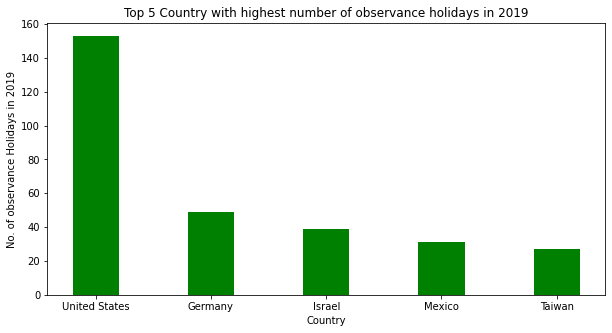

In [11]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_observance['country_name'], result_observance['counts'], color ='green',  
        width = 0.4) 
  
plt.xlabel("Country") 
plt.ylabel("No. of observance Holidays in 2019") 
plt.title("Top 5 Country with highest number of observance holidays in 2019") 
plt.show() 